What is K-Means Clustering?
Clustering is a technique that partitions data into groups or clusters based on similarity.
K-means is one of the oldest and most approachable clustering methods.
It aims to minimize the sum of distances between data points and their respective cluster centroids.


Step 1: Preprocessing the Data
Load your dataset and preprocess it (e.g., handle missing values, normalize features).

Step 2: Choose the Number of Clusters (K)
Decide how many clusters you want to create.

Step 3: Initialize Cluster Centers
Randomly select K data points as initial cluster centers.

Step 4: Assign Data Points to Clusters
Calculate the distance between each data point and the cluster centers.
Assign each data point to the nearest cluster.

Step 5: Update Cluster Centers
Recalculate the cluster centers based on the assigned data points.

Step 6: Repeat Steps 4 and 5 Until Convergence
Iterate until the cluster centers no longer change significantly.

Step 7: Visualize the Clusters

In [8]:
!pip install --upgrade kneed

D:\Anaconda3InstalledHere\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


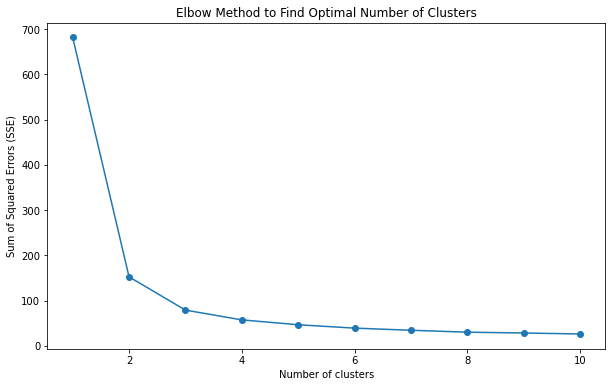

 optimum number of clusters found using Knee Locator=  3


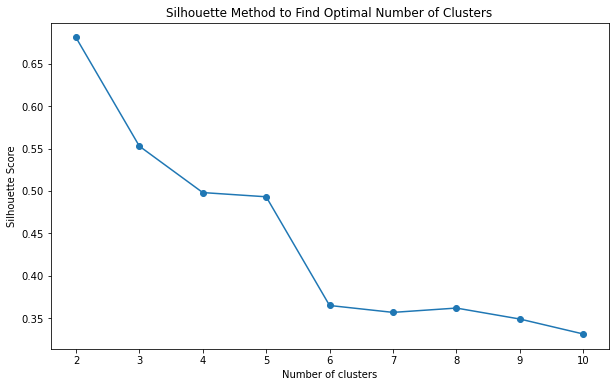

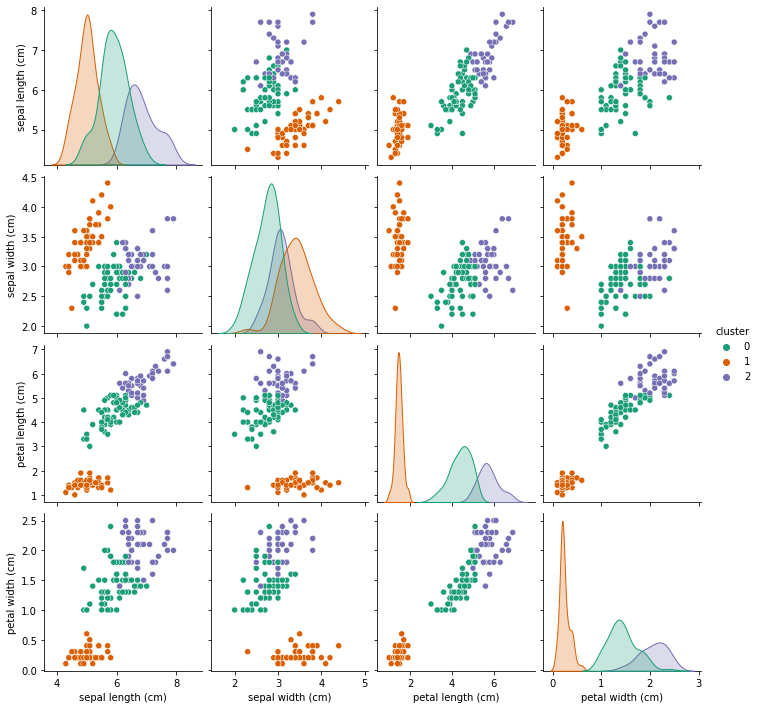

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from kneed import DataGenerator, KneeLocator

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Elbow method to find the optimal number of clusters
def plot_elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method to Find Optimal Number of Clusters')
    plt.show()
    kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

    print(f" optimum number of clusters found using Knee Locator=  {kl.elbow}")


plot_elbow_method(iris_df)


# Silhouette method to find the optimal number of clusters
def plot_silhouette_method(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method to Find Optimal Number of Clusters')
    plt.show()

plot_silhouette_method(iris_df)

# K-means clustering with optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
iris_df['cluster'] = kmeans.fit_predict(iris_df)

# Visualize clustering results
sns.pairplot(iris_df, hue='cluster', palette='Dark2')
plt.show()
